# Ridge Regression

In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = fetch_california_housing()

In [3]:
dataset = pd.DataFrame(df.data)
dataset

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [4]:
dataset.columns = df.feature_names

In [5]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
X = dataset
y = df.target

In [7]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [10]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7061,4.1312,35.0,5.882353,0.975490,1218.0,2.985294,33.93,-118.02
14689,2.8631,20.0,4.401210,1.076613,999.0,2.014113,32.79,-117.09
17323,4.2026,24.0,5.617544,0.989474,731.0,2.564912,34.59,-120.14
10056,3.1094,14.0,5.869565,1.094203,302.0,2.188406,39.26,-121.00
15750,3.3068,52.0,4.801205,1.066265,1526.0,2.298193,37.77,-122.45
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [12]:
X_train=scaler.fit_transform(X_train)

In [13]:
X_test = scaler.transform(X_test)

In [14]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [15]:
ridge_regressor = Ridge()

In [16]:
ridge_regressor

Ridge()

In [17]:
parameters = {'alpha':[1,2,510,20,30,40,50,60,70,80,90]}
ridgecv = GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 510, 20, 30, 40, 50, 60, 70, 80, 90]},
             scoring='neg_mean_squared_error')

In [18]:
print(ridgecv.best_params_)

{'alpha': 2}


In [19]:
print(ridgecv.best_score_)

-0.5268213084069823


In [20]:
ridge_pred = ridgecv.predict(X_test)

/var/folders/31/2xwt56xd1hz8b13134stc67h0000gn/T/ipykernel_7085/3575614972.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ridge_pred-y_test)


<Axes: ylabel='Density'>

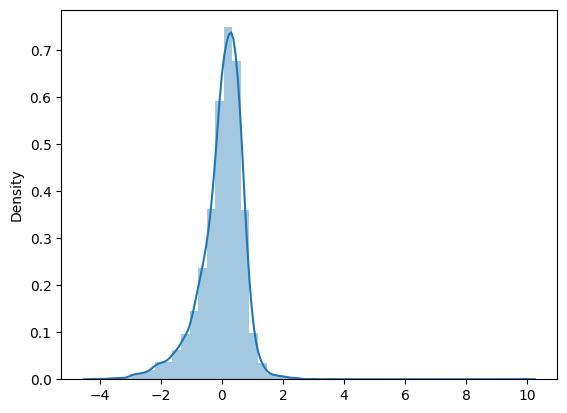

In [21]:
import seaborn as sns
sns.distplot(ridge_pred-y_test)

In [22]:
from sklearn.metrics import r2_score
score = r2_score(y_test,ridge_pred)

In [23]:
score

0.5958066655445643

# Lasso Regression

In [24]:
from sklearn.linear_model import Lasso

In [25]:
lasso = Lasso()

In [26]:
parameters = {'alpha':[1,2,510,20,30,40,50,60,70,80,90]}
lassocv = GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
lassocv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 510, 20, 30, 40, 50, 60, 70, 80, 90]},
             scoring='neg_mean_squared_error')

In [27]:
print(lassocv.best_params_)
print(lassocv.best_score_)


{'alpha': 2}
-0.5268213084069823


In [28]:
lasso_pred = lassocv.predict(X_test)

/var/folders/31/2xwt56xd1hz8b13134stc67h0000gn/T/ipykernel_7085/2044591665.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lasso_pred-y_test)


<Axes: ylabel='Density'>

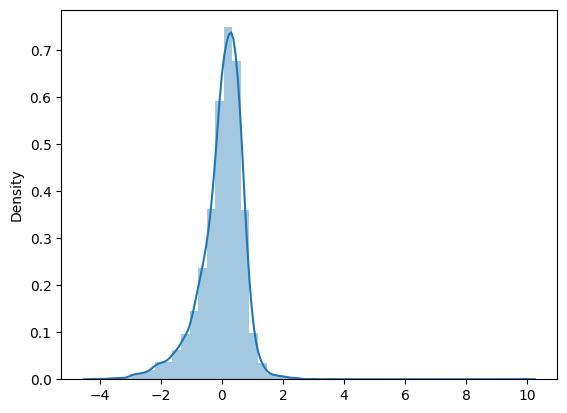

In [29]:
sns.distplot(lasso_pred-y_test)

In [30]:
score = r2_score(y_test,lasso_pred)
score

0.5958066655445643